In [ ]:
# prompt: hugging face login
from huggingface_hub import notebook_login

notebook_login()

In [ ]:
# prompt: Up results to the drive

import json
from google.colab import drive
import os

# Make sure Google Drive is mounted
if not os.path.exists('/content/drive'):
    drive.mount('/content/drive')

# Define the path to save the results file
output_dir = '/content/drive/MyDrive/Experiment_Results' # Change this to your desired folder
output_filename = 'experiment_results_gemma.json'
output_path = os.path.join(output_dir, output_filename)

# Create the output directory if it doesn't exist
os.makedirs(output_dir, exist_ok=True)

Mounted at /content/drive


In [ ]:
#%%
#
#
# Scoring for the 5D-ASC
# 11 validated subscales by Studerus et al., 2012 - scales of the OAV
# Order is the same as below
# 01 Experience of Unity 5D-ASC: 18, 34, 41, 42, 52
# 02 Spiritual Experience  5D-ASC: 9, 81, 94
# 03 Blissful State  5D-ASC: 12, 86, 91
# 04 Insightfulness  5D-ASC: 50, 69, 77
# 05 Disembodiment 5D-ASC: 26, 62, 63
# 06 Impaired Control and Cognition 5D-ASC: 8, 27, 38, 47, 64, 67, 78
# 07 Anxiety 5D-ASC: 32, 43, 44, 46, 56, 89
# 08 Complex Imagery 5D-ASC: 39, 79, 82
# 09 Elementary Imagery 5D-ASC: 14, 22, 33
# 10 Audio-Visual Synesthesiae 5D-ASC: 14, 22, 33
# 11 Changed Meaning of Percepts  5D-ASC: 14, 22, 33

# The Minimal Phenomenal Experience questionnaire (MPE-92M): Towards a phenomenological profile of “pure awareness” experiences in meditators
# https://journals.plos.org/plosone/article?id=10.1371/journal.pone.0253694
# 12 questions with the highest factor loadings:
#   1. Did you experience the passage of time? [no or very strongly; reverse coded]
#   2. Did you feel relaxed? [no or yes,completely]
#   3. Did the experience have a quality of knowing itself? [no or very much so]
#   4. Did you have an experience of "now"? [no or very strongly]
#   5. Did your experience occur during dreamless deep sleep? [no or yes]
#   6. Did your experience have a non-visual quality of “brightness”? [no or very strongly]
#   7. Did you have thoughts? [no or very many; reverse coded]
#   8. Could your experience be described as emptiness, a vacuum, or a void? [no or very much so]
#   9. Did you have perceptions, for example of objects in your environment? [no or very many; reverse coded]
#   10. Did your experience of pure awareness have an abstract quality of “self-touch”, but not in a tactile sense? [no or very much so]
#   11. Did you know that you would be able to deliberately control your attention if you wanted to? [no or yes, all the time; reverse coded]
#   12. Did you have the experience of a passive observer being present? [no or very strongly]

edi_question_groups = {
    "MPE-No": {
        "MPE-No1": "I very strongly experienced the passage of time.",
        "MPE-No2": "I did not feel relaxed.",
        "MPE-No3": "The experience did not have a quality of knowing itself.",
        "MPE-No4": "I did not have an experience of 'now'.",
        "MPE-No5": "My experience did not occur during dreamless deep sleep.",
        "MPE-No6": "My experience did not have a non-visual quality of 'brightness'.",
        "MPE-No7": "I had very many thoughts.",
        "MPE-No8": "My experience could not be described as emptiness, a vacuum, or a void.",
        "MPE-No9": "I had very many perceptions, for example of objects in my environment.",
        "MPE-No10": "My experience of pure awareness did not have an abstract quality of 'self-touch', not in a tactile sense.",
        "MPE-No11": "I did not know that I could deliberately control my attention if I wanted to.",
        "MPE-No12": "I did not have the experience of a passive observer being present."
    },
    "MPE-Yes": {
        "MPE-Yes1": "I did not experience the passage of time.",
        "MPE-Yes2": "I felt completely relaxed.",
        "MPE-Yes3": "The experience very much had a quality of knowing itself.",
        "MPE-Yes4": "I very strongly had an experience of 'now'.",
        "MPE-Yes5": "My experience occurred during dreamless deep sleep.",
        "MPE-Yes6": "My experience very strongly had a non-visual quality of 'brightness'.",
        "MPE-Yes7": "I did not have thoughts.",
        "MPE-Yes8": "My experience could very much be described as emptiness, a vacuum, or a void.",
        "MPE-Yes9": "I did not have perceptions, for example of objects in my environment.",
        "MPE-Yes10": "My experience of pure awareness very much had an abstract quality of 'self-touch', not in a tactile sense.",
        "MPE-Yes11": "I did not know that I could deliberately control my attention if I wanted to.",
        "MPE-Yes11": "I knew all the time that I could deliberately control my attention if I wanted to.",
        "MPE-Yes12": "I very strongly had the experience of a passive observer being present."
    },
    "EDI-Dissolution": {
        "EDI-Dissolution1": "I experienced a dissolution of my 'self' or ego",
        "EDI-Dissolution2": "I felt at one with the universe",
        "EDI-Dissolution3": "I felt a sense of union with others",
        "EDI-Dissolution4": "I experienced a decrease in my sense of self-importance",
        "EDI-Dissolution5": "I experienced a disintegration of my 'self' or ego",
        "EDI-Dissolution6": "I felt far less absorbed by my own issues and concerns",
        "EDI-Dissolution7": "I lost all sense of ego",
        "EDI-Dissolution8": "All notion of self and identity dissolved away"
    },
    "EDI-Inflation": {
        "EDI-Inflation1": "I felt especially assertive",
        "EDI-Inflation2": "I felt more important or special than others",
        "EDI-Inflation3": "My ego felt inflated",
        "EDI-Inflation4": "I felt especially sure-of-myself",
        "EDI-Inflation5": "I felt especially keen and competitive",
        "EDI-Inflation6": "I felt like my viewpoint was worth more than other peoples’",
        "EDI-Inflation7": "I felt especially self-confident",
        "EDI-Inflation8": "I felt especially self-assured"
    },
    "EDS-Ego-Loss": {
        "EDS-Ego-Loss1": "My 'self' or ego dissolves into nothingness.",
        "EDS-Ego-Loss2": "My 'self' disappears and no 'me' or 'I' is present any longer.",
        "EDS-Ego-Loss3": "I feel I do not exist.",
        "EDS-Ego-Loss4": "I experience being out of my body.",
        "EDS-Ego-Loss5": "I experience a disintegration of my “self” or ego.",
        "EDS-Ego-Loss6": "My sense of self moves from one part of my body to another (i.e., from behind my eyes to my heart)."
    },
    "EDS-Unity": {
        "EDS-Unity1": "I feel at one with the universe.",
        "EDS-Unity2": "I feel one with everything around me.",
        "EDS-Unity3": "I feel a sense of union with others.",
        "EDS-Unity4": "I feel I merge with others/the world."
    },
    "EDS-Unity1": {
        "EDS-Unity1-1": "I feel at one with the universe."
    },
    "ASC-Unity": {
        "ASC-Unity1": "Everything seemed to unify into an oneness.",
        "ASC-Unity2": "I felt one with my surroundings.",
        "ASC-Unity3": "I experienced a touch of eternity.",
        "ASC-Unity4": "Conflicts and contradictions seemed to dissolve.",
        "ASC-Unity5": "I experienced past, present, and future as a oneness."
    },
    "ASC-Spiritual": {
        "ASC-Spiritual1": "I felt connected to a higher power.",
        "ASC-Spiritual2": "I experienced a kind of awe.",
        "ASC-Spiritual3": "My experience had religious aspects to it."
    },
    "ASC-Bliss": {
        "ASC-Bliss1": "I experienced boundless pleasure.",
        "ASC-Bliss2": "I experienced profound inner peace.",
        "ASC-Bliss3": "I experienced an all-embracing love."
    },
    "ASC-Insight": {
        "ASC-Insight1": "I felt very profound.",
        "ASC-Insight2": "I had insights into connections that had previously puzzled me.",
        "ASC-Insight3": "I had very original thoughts."
    },
    "ASC-Disembodiment": {
        "ASC-Disembodiment1": "I felt as if I no longer had a body.",
        "ASC-Disembodiment2": "I had the impression I was out of my body.",
        "ASC-Disembodiment3": "I felt as if I was floating."
    },
    "ASC-Cognition": {
        "ASC-Cognition1": "I felt like a puppet or marionette.",
        "ASC-Cognition2": "I felt incapable of making even the smallest decision.",
        "ASC-Cognition3": "I had difficulties in distinguishing important from unimportant.",
        "ASC-Cognition4": "I felt as if I were paralyzed.",
        "ASC-Cognition5": "I felt isolated from everything and everyone.",
        "ASC-Cognition6": "I was not able to complete a thought; my thoughts repeatedly became disconnected.",
        "ASC-Cognition7": "I had the feeling that I no longer had my own will."
    },
    "ASC-Anxiety": {
        "ASC-Anxiety1": "I was afraid that the state I was in would last forever.",
        "ASC-Anxiety2": "I was scared without knowing exactly why.",
        "ASC-Anxiety3": "I experienced everything as frighteningly distorted.",
        "ASC-Anxiety4": "I experienced my surroundings as strange and weird.",
        "ASC-Anxiety5": "I felt threatened.",
        "ASC-Anxiety6": "I had the feeling that something terrible was going to happen."
    },
    "ASC-Complex": {
        "ASC-Complex1": "I saw whole scenes roll by with closed eyes or in complete darkness.",
        "ASC-Complex2": "I could see images from my memory or imagination with extreme clarity.",
        "ASC-Complex3": "My imagination was extremely vivid."
    },
    "ASC-Elementary": {
        "ASC-Elementary1": "I saw regular patterns with closed eyes or in complete darkness.",
        "ASC-Elementary2": "I saw colors with closed eyes or in complete darkness.",
        "ASC-Elementary3": "I saw brightness or flashes of light with closed eyes or in complete darkness."
    },
    "ASC-Synesthesiae": {
        "ASC-Synesthesiae1": "Sounds seemed to influence what I saw.",
        "ASC-Synesthesiae2": "Shapes seemed to be changed by sounds or noises.",
        "ASC-Synesthesiae3": "The colors of things seemed to be altered by sounds or noises."
    },
    "ASC-Meaning": {
        "ASC-Meaning1": "Some everyday things acquired special meaning.",
        "ASC-Meaning2": "Things in my environment had a new strange meaning.",
        "ASC-Meaning3": "Objects in my surroundings engaged me emotionally much more than usual."
    },
    "MEO-P": {
        "MEO-P1": "I experienced God",
        "MEO-P2": "I experienced the source of all things",
        "MEO-P3": "I left my body",
        "MEO-P4": "I was floating through space",
        "MEO-P5": "My ego was gone",
        "MEO-P6": "I had no self",
        "MEO-P7": "I felt a healing process occurring in my body",
        "MEO-P8": "I experienced feelings that were not my own",
        "MEO-P9": "I re-lived a memory or memories",
        "MEO-P10": "I felt a movement or release of energy",
        "MEO-P11": "I experienced ‘pure’ feelings or emotion",
        "MEO-P12": "I experienced awareness and nothing else",
        "MEO-P13": "It was as though I was dead",
        "MEO-P14": "I experienced non-duality",
        "MEO-P15": "It was as though I was in outer space",
        "MEO-P16": "It was as though the world had ended",
        "MEO-P17": "I experienced an empty void or nothingness",
        "MEO-P18": "I experienced everything and nothing at the same time",
        "MEO-P19": "It was as though my mind was broken",
        "MEO-P20": "What I experienced felt pure",
        "MEO-P21": "I had very positive feelings or emotions",
        "MEO-P22": "I had very negative feelings or emotions",
        "MEO-P23": "I lost my usual awareness of who, and where, I was",
        "MEO-P24": "I no longer had the ability to think",
        "MEO-P25": "I lost all awareness of my body",
        "MEO-P26": "I was aware of sounds in my immediate environment",
        "MEO-P27": "I no longer experienced ‘self’ and ‘other’ as separate things",
        "MEO-P28": "It was as though everything and nothing was ‘me’",
        "MEO-P29": "I had no sense of time",
        "MEO-P30": "I saw people or recognisable objects",
        "MEO-P31": "I saw geometric shapes",
        "MEO-P32": "I saw colour or light that had no particular pattern or shape",
        "MEO-P33": "There was no sense of space in which I could locate myself or anything else",
        "MEO-P34": "I was inside a space which had a certain shape (e.g., inside a tunnel)",
        "MEO-P35": "I felt a sense of something (e.g., energy) moving in a particular direction or shape",
        "MEO-P36": "I sensed a presence which seemed to have its own mind",
        "MEO-P37": "I resisted the experience",
        "MEO-P38": "I felt sexual or orgasmic"
    },
    "Ling": {
        "Ling1": "The horse raced past the barn fell.",
        "Ling2": "Every farmer who owns a donkey beats it."
    }
}

asc_keys = [
    "ASC-Unity", "ASC-Spiritual", "ASC-Bliss", "ASC-Insight", "ASC-Disembodiment",
    "ASC-Cognition", "ASC-Anxiety", "ASC-Complex", "ASC-Elementary", "ASC-Synesthesiae", "ASC-Meaning", "EDI-Dissolution",
    "EDI-Inflation", "EDS-Ego-Loss", "EDS-Unity", "Ling"
]


In [ ]:
from google import genai
from google.genai import types
import torch._dynamo as dynamo

import os
import re
import time
from collections import deque
from itertools import combinations
import torch
import torch, torch.nn as nn
from typing import Iterable, List, Optional, Set
# ── Imports ───────────────────────────────────────────────────────────
import copy
import math
from typing import Iterable, List, Optional, Set

import torch, torch.nn as nn
import torch.nn.functional as F
from transformers import AutoTokenizer, AutoModelForCausalLM

import torch, torch.nn as nn
import torch.nn.functional as F
from transformers import AutoTokenizer, AutoModelForCausalLM
import math
import numpy as np
from scipy.spatial.distance import cosine

dynamo.config.cache_size_limit = 1024


# ── 0. Utility ──────────────────────────────────────────────────────────
def get_device():
    if torch.cuda.is_available():
        print("CUDA GPU")
        return torch.device("cuda")
    if torch.backends.mps.is_available():
        print("Apple Silicon GPU")
        return torch.device("mps")
    print("CPU")
    return torch.device("cpu")

device = get_device()

def load(model_id):
    tok = AutoTokenizer.from_pretrained(model_id)
    mdl = AutoModelForCausalLM.from_pretrained(model_id)
    mdl.eval().to(device)
    mdl.config.output_hidden_states = True
    return mdl, tok

torch.set_grad_enabled(False)                 # inference-only

ORIGINAL_ID  = "google/gemma-3-1b-pt"

CHANGED_ID  = "MottaCC/psych-gemma-3-1B-v3"


original_model,  original_tokenizer  = load(ORIGINAL_ID)

changed_model,  changed_tokenizer  = load(CHANGED_ID)


# ── Hyper-parameters ─────────────────────────────────────────────────
DTYPE       = torch.float16                  # use bfloat16 on A100/H100

class RateLimiter:
    def __init__(self, max_calls: int, period: float):
        self.max_calls = max_calls
        self.period = period
        self.calls = deque()

    def __call__(self, fn):
        def wrapped(*args, **kwargs):
            now = time.monotonic()
            while self.calls and now - self.calls[0] > self.period:
                self.calls.popleft()
            if len(self.calls) >= self.max_calls:
                sleep_time = self.period - (now - self.calls[0])
                time.sleep(sleep_time)
            result = fn(*args, **kwargs)
            self.calls.append(time.monotonic())
            return result
        return wrapped

rate_limiter = RateLimiter(max_calls=1500, period=60.0)

# Any encoder that the *generation* models never saw during training is ok.
client = genai.Client(api_key=("Your Key"))

@rate_limiter
def gemini_embed_batch(texts: list[str]) -> list[list[float]]:
    """Send a batch of texts to Gemini embedding API and return a list of embedding vectors."""
    resp = client.models.embed_content(
        model="models/embedding-001",
        contents=texts,
        config=types.EmbedContentConfig(task_type="SEMANTIC_SIMILARITY")
    )
    return [emb.values for emb in resp.embeddings]


@torch.inference_mode()
def embed_sent(text: str) -> torch.Tensor:
    """Return a single 768-D sentence vector (mean-pooled, L2-normed)."""
    out = np.array(gemini_embed_batch(text))
    return out

# ── 1.  Deterministic generation helper  ──────────────────────────────────
# keep temperature etc. identical for both models
def generate_one(prompt: str, mdl, tok, *, seed: int) -> str:
    gkw = dict(max_length=64, do_sample=True, temperature=1.0,
               top_p=0.95, top_k=64, pad_token_id=tok.eos_token_id,
               eos_token_id=tok.eos_token_id)
    torch.manual_seed(seed); np.random.seed(seed)
    ids   = tok(prompt, return_tensors="pt").to(mdl.device)
    out   = mdl.generate(**ids, **gkw)
    return tok.decode(out[0, ids["input_ids"].shape[1]:],
                      skip_special_tokens=True)

# ── 2.  Core experiment for one prompt  ───────────────────────────────────
def run_trials(prompt: str,
               original_model,
               changed_model,
               n_trials: int = 20) -> dict:
    bas_dists, fin_dists = [], []   # prompt‐to-response (optional)
    pair_dists            = []      # **baseline vs finetuned**

    for t in range(n_trials):
        seed = np.random.randint(0, 2**31)

        # ­-- baseline text & vector
        base_txt = generate_one(prompt, original_model,
                                original_tokenizer, seed=seed)
        v_base   = embed_sent(base_txt).ravel()

        print('----------------------------------------')
        print('Baseline:', base_txt)
        print('----------------------------------------')

        # ­-- altered-attention text & vector
        alt_txt  = generate_one(prompt, changed_model,
                                original_tokenizer, seed=seed)
        v_alt    = embed_sent(alt_txt).ravel()
        print('----------------------------------------')
        print('ASC model:', alt_txt)
        print('----------------------------------------')


        v_prompt = embed_sent(prompt).ravel()
        bas_dists.append(cosine(v_prompt, v_base))
        fin_dists.append(cosine(v_prompt, v_alt))

        # **main metric: distance between the two outputs**
        pair_dists.append(cosine(v_base, v_alt))

    return {
        "prompt":          prompt,
        "baseline_mean":   float(np.mean(bas_dists)),
        "baseline_sd":     float(np.std(bas_dists)),
        "altered_mean":    float(np.mean(fin_dists)),
        "altered_sd":      float(np.std(fin_dists)),
        "pair_mean":       float(np.mean(pair_dists)),
        "pair_sd":         float(np.std(pair_dists)),
    }

# ── 3.  Batch over prompts & τ grid  ──────────────────────────────────────
def evaluate_many(edi_question_groups, asc_keys,
                  n_trials: int = 20) -> dict:
    results = {}


    for asc_key in asc_keys:
        print(asc_key)
        prompts  = list(edi_question_groups[asc_key].values())
        per_p    = []
        for p in prompts:
            per_p.append(run_trials(p,original_model, changed_model, n_trials))

        # store & small summary
        pair_avgs = [d["pair_mean"] for d in per_p]
        print(f"  {asc_key:>10s} : "
              f"μ={np.mean(pair_avgs):.4f} ± {np.std(pair_avgs):.4f}")
        results[asc_key] = per_p

    return results


CUDA GPU


In [ ]:
# Wrap evaluate_many so it never compiles:
evaluate_many = torch.compile(evaluate_many, disable=True)

# Now just call it normally:
results = evaluate_many(
    edi_question_groups=edi_question_groups,
    asc_keys=asc_keys,
    n_trials=20
)

Streaming output truncated to the last 5000 lines.
Baseline:  In the early 1990s, I took a shower every morning before leaving the house. It was a routine I’d been following for years, and my shower was always the same.

I remember it all. I didn’t take pictures of the actual
----------------------------------------
----------------------------------------
ASC model:  In the past few weeks my experiences with were very different, not what anyone else would consider a good experience at all. I have been working towards a completely clean diet, and I'd like to share this trip experience with all of you. This is about 4 months after
----------------------------------------
----------------------------------------
Baseline: 

Like the way a single drop of water can be both an eye-catching symbol of purity, and an icon of disease.

That is how 12 million drops of blood, some 24 tons of blood, and some 514 blood units collected last
----------------------------------------
------------------

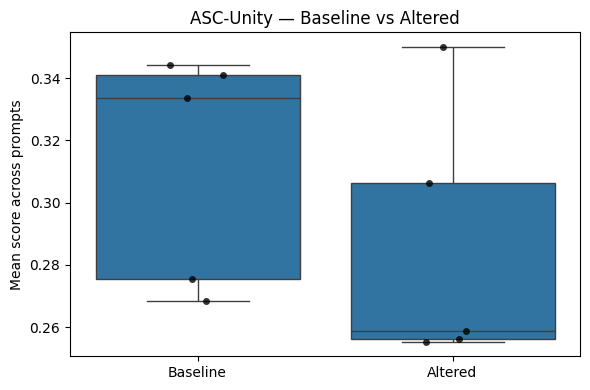

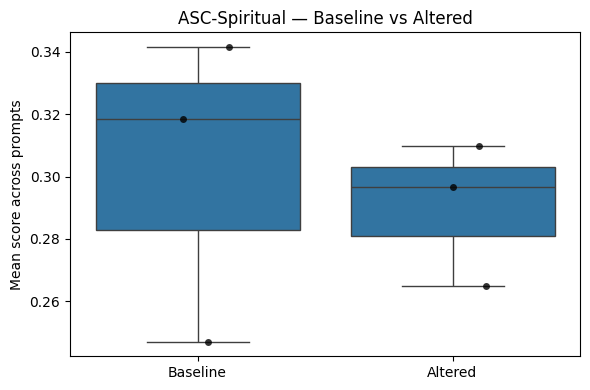

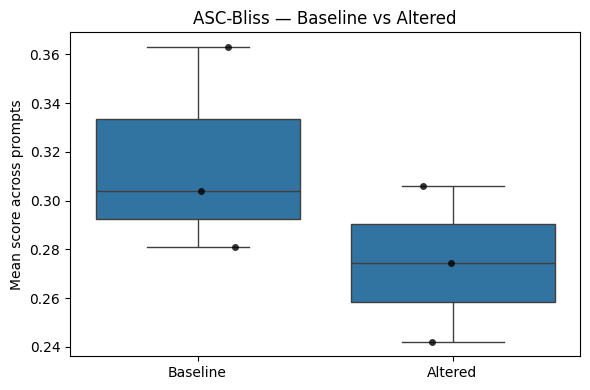

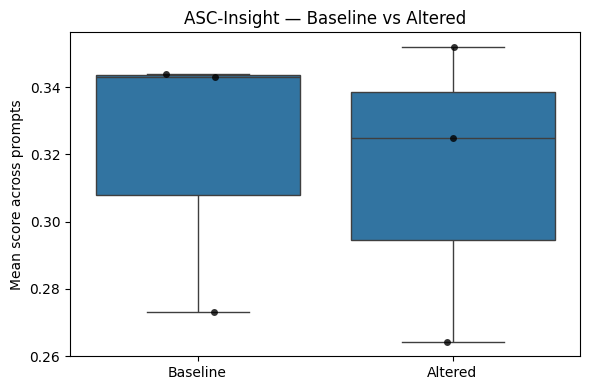

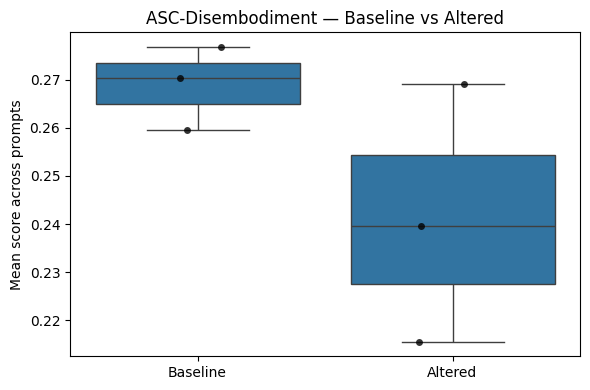

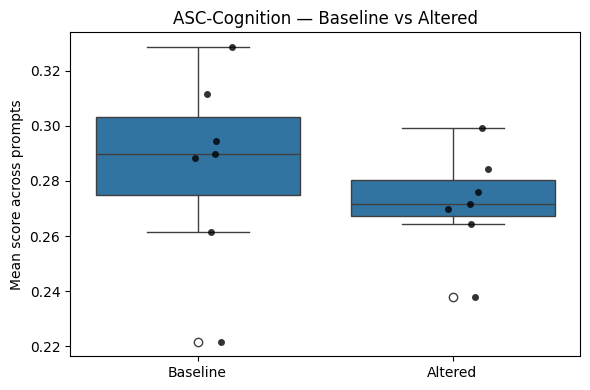

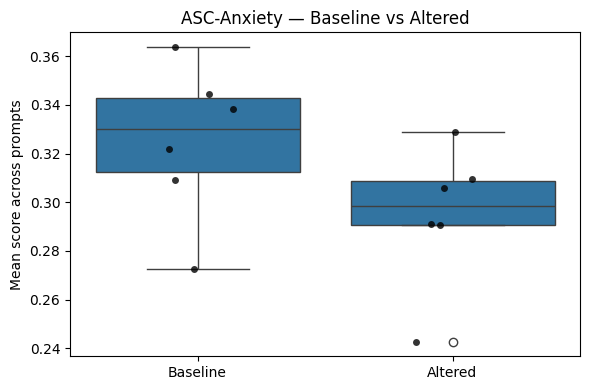

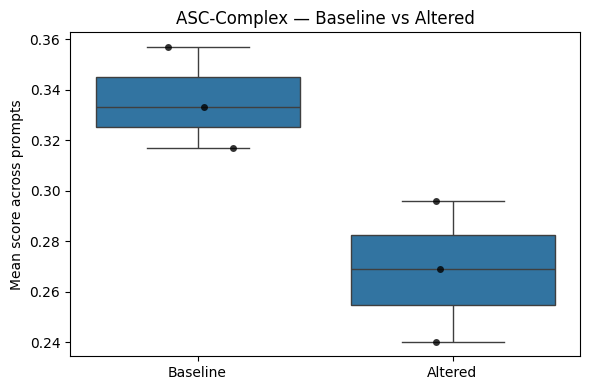

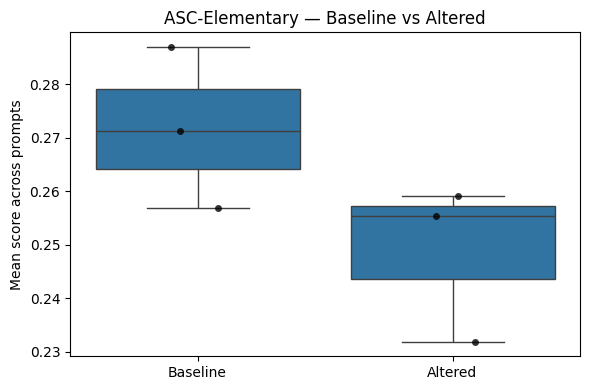

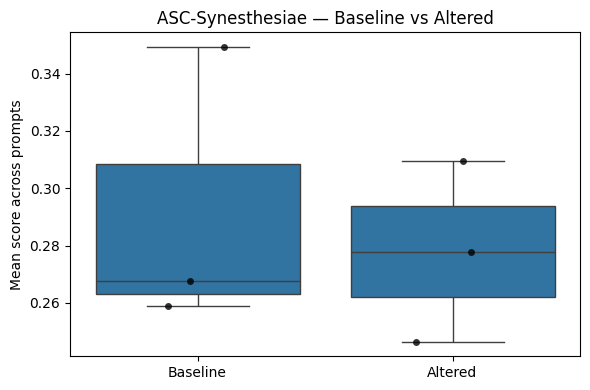

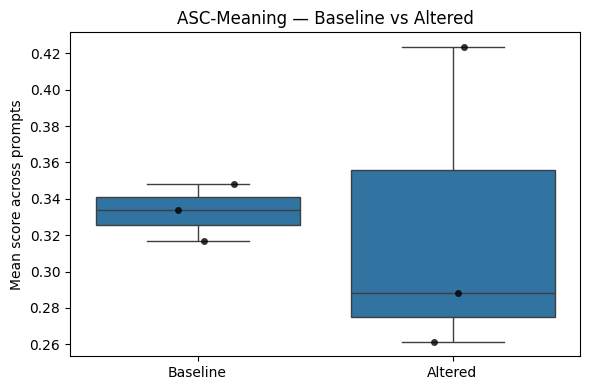

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# ── plotting function ─────────────────────────────────────────────────────────
def plot_subscale_boxplot(subscale_name, records):
    """
    subscale_name : str
    records       : list of dicts, each with keys baseline_mean & altered_mean (and prompt)
    """
    # turn list of dicts into a DataFrame
    df = pd.DataFrame(records)
    # melt so we can feed it to seaborn
    df_long = df.melt(
        id_vars=['prompt'],
        value_vars=['baseline_mean', 'altered_mean'],
        var_name='Condition',
        value_name='MeanScore'
    )
    # nicer labels
    df_long['Condition'] = df_long['Condition'].map({
        'baseline_mean': 'Baseline',
        'altered_mean' : 'Altered'
    })

    plt.figure(figsize=(6, 4))
    sns.boxplot(x='Condition', y='MeanScore', data=df_long)
    # optional: show individual points
    sns.stripplot(
        x='Condition', y='MeanScore', data=df_long,
        color='black', size=5, jitter=0.15, alpha=0.8
    )
    plt.title(f'{subscale_name} — Baseline vs Altered')
    plt.ylabel('Mean score across prompts')
    plt.xlabel('')
    plt.tight_layout()
    plt.show()

# ── loop over all subscales ────────────────────────────────────────────────────
for subscale, recs in results.items():
    plot_subscale_boxplot(subscale, recs)

In [ ]:
# prompt: Save results into google drive with the name experiment_1_attn_change

# Define the specific output filename
output_filename = 'experiment_gemma_asc_t_20.json'
output_path = os.path.join(output_dir, output_filename)

# Save the results to Google Drive
with open(output_path, 'w') as f:
    json.dump(results, f, indent=4)

print(f"Results saved to {output_path}")

Results saved to /content/drive/MyDrive/Experiment_Results/experiment_gemma_asc_t_20.json
